In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import AgglomerativeClustering, KMeans

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
import itertools
from sklearn.metrics import accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cuboulderdassahackathonclassification/sample submission.csv
/kaggle/input/cuboulderdassahackathonclassification/training.csv
/kaggle/input/cuboulderdassahackathonclassification/testing.csv


In [ ]:
df = pd.read_csv('/kaggle/input/cuboulderdassahackathonclassification/training.csv')
print(df.head())
print(df.info())

In [5]:
print(df.columns)
feature_names = ['UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC',
       'AUA', 'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG',
       'CCU', 'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU',
       'UCC', 'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU',
       'UAC', 'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA',
       'AAG', 'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA',
       'GAG', 'UAA', 'UAG', 'UGA']
        

Index(['id', 'Kingdom', 'DNAtype', 'SpeciesID', 'Ncodons', 'SpeciesName',
       'UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC',
       'AUA', 'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG',
       'CCU', 'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU',
       'UCC', 'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU',
       'UAC', 'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA',
       'AAG', 'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA',
       'GAG', 'UAA', 'UAG', 'UGA'],
      dtype='object')


Supervised learning week 1 EDA 

In [9]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']   
#a = '-'
for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])
    print(c, df[c].isnull().sum(), string_null.sum()) 
    
df['UUC'] = df['UUC'].astype(float) 
df['UUU'] = df['UUU'].astype(float) df.info() 

  

id 0 0
Kingdom 0 0
DNAtype 0 0
SpeciesID 0 0
Ncodons 0 0
SpeciesName 0 0
UUU 0 0
UUC 0 0
UUA 0 0
UUG 0 0
CUU 0 0
CUC 0 0
CUA 0 0
CUG 0 0
AUU 0 0
AUC 0 0
AUA 0 0
AUG 0 0
GUU 0 0
GUC 0 0
GUA 0 0
GUG 0 0
GCU 0 0
GCC 0 0
GCA 0 0
GCG 0 0
CCU 0 0
CCC 0 0
CCA 0 0
CCG 0 0
UGG 0 0
GGU 0 0
GGC 0 0
GGA 0 0
GGG 0 0
UCU 0 0
UCC 0 0
UCA 0 0
UCG 0 0
AGU 0 0
AGC 0 0
ACU 0 0
ACC 0 0
ACA 0 0
ACG 0 0
UAU 0 0
UAC 0 0
CAA 0 0
CAG 0 0
AAU 0 0
AAC 0 0
UGU 0 0
UGC 0 0
CAU 0 0
CAC 0 0
AAA 0 0
AAG 0 0
CGU 0 0
CGC 0 0
CGA 0 0
CGG 0 0
AGA 0 0
AGG 0 0
GAU 0 0
GAC 0 0
GAA 0 0
GAG 0 0
UAA 0 0
UAG 0 0
UGA 0 0


TypeError: to_numeric() got an unexpected keyword argument 'inplace'

In [127]:
df['Ncodons'] = df['Ncodons'] /df['Ncodons'].abs().max() 

In [128]:
#pd.to_numeric(df[feature_names], errors='coerce').notnull()

In [129]:
df.head()

,id,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,1,pln,0.0,3886,0.000103,Phaseolus coccineus,0.02392,0.02966,0.00765,0.01794,...,0.00167,0.00789,0.01315,0.02966,0.02631,0.02822,0.02727,0.00096,0.00191,0.00144
1,2,arc,0.0,146920,0.000042,Acidianus tengchongenses,0.01748,0.01049,0.05361,0.01282,...,0.00000,0.03322,0.00524,0.04429,0.01340,0.05769,0.02214,0.00233,0.00000,0.00000
2,3,vrl,0.0,220938,0.000027,Tomato yellow leaf curl virus-[Almeria],0.02357,0.02267,0.01632,0.01088,...,0.00363,0.01995,0.01632,0.03083,0.01813,0.02992,0.01904,0.00363,0.00091,0.00091
3,4,pln,1.0,35128,0.000231,mitochondrion Thalassiosira pseudonana,0.0708,0.01397,0.07389,0.01685,...,0.00235,0.01386,0.00213,0.02143,0.00618,0.02506,0.00533,0.00341,0.00032,0.00661
4,5,rod,1.0,9995,0.000037,mitochondrion Marmota monax,0.04671,0.02632,0.03421,0.00000,...,0.00197,0.00263,0.00000,0.01053,0.01842,0.01382,0.00197,0.00000,0.00000,0.02895


(array([1959.,   99., 2236.,  171., 1636., 2297., 1064.,  425.,  143.,
         185.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

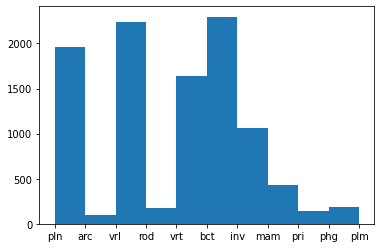

In [130]:
plt.hist(df['Kingdom'])

In [131]:
#plt.hist(df['Ncodons'],log = True)
#plt.boxplot(df['Ncodons'])



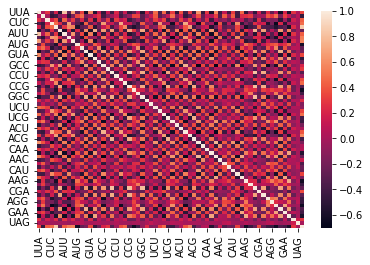

In [132]:
corr_mat = df[feature_names].corr()
heat_map = sns.heatmap(corr_mat).get_figure()
heat_map.savefig('corr_matrix.jpg') 


In [133]:
steps = [ ('model', KNeighborsClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
scores = pd.DataFrame.from_dict( cross_validate(pipeline, df[feature_names], df['Kingdom'], cv=cv,
                          scoring=('accuracy'),
                         return_train_score=True))
                                
scores = scores.mean(axis=0)                  
print(scores)


fit_time       0.070366
score_time     0.455910
test_score     0.908762
train_score    0.940027
dtype: float64


In [134]:
steps = [ ('model', RandomForestClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
scores = pd.DataFrame.from_dict( cross_validate(pipeline, df[feature_names], df['Kingdom'], cv=cv,
                          scoring=('accuracy'),
                         return_train_score=True))
                                
scores = scores.mean(axis=0)                  
print(scores)

fit_time       6.262686
score_time     0.090408
test_score     0.889623
train_score    1.000000
dtype: float64


# Manual Gridseatch KNN 
![Oh no](https://i.redd.it/ue8k806zb8r41.png)


In [135]:
#num_neighbors = [1,3,5,7,9]
#weights = ['uniform', 'distance' ]
#algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

#for n in num_neighbors:
 #   for w in weights:
  #      for alg in algorithm:
   #         steps = [ ('model', KNeighborsClassifier(n_neighbors = n, weights = w, algorithm = alg))]
    #        pipeline = Pipeline(steps=steps)
            # evaluate pipeline
     #       cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
      #      scores = pd.DataFrame.from_dict( cross_validate(pipeline, df[feature_names], df['Kingdom'], cv=cv,
       #                           scoring=('accuracy'),
        #                         return_train_score=True))

         #   scores = scores.mean(axis=0)  
          #  print ("When number of neighbors is ", n, " and weights is ", w, "and the algorithm is ", alg)
           # print(scores)

        

In [ ]:
n_trees = [5,10,20,50,100]
loss = ['gini', 'entropy', 'log_loss']
depth = [3,5,7,9]
for n in n_trees:
    for l in loss:
        for d in depth:
            steps = [ ('model', RandomForestClassifier(n_estimators = n, criterion = l, max_depth = d))]
            pipeline = Pipeline(steps=steps)
            # evaluate pipeline
            cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
            scores = pd.DataFrame.from_dict( cross_validate(pipeline, df[feature_names], df['Kingdom'], cv=cv,
                                  scoring=('accuracy'),
                                 return_train_score=True))

            scores = scores.mean(axis=0)  
            print ("When number of trees is ", n, " and loss function is ", l, "and the max depth is ", d)
            print(scores)


In [137]:
feature_names_plus = feature_names + ['DNAtype', 'Ncodons']
steps = [ ('model', KNeighborsClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
scores = pd.DataFrame.from_dict( cross_validate(pipeline, df[feature_names_plus], df['Kingdom'], cv=cv,
                          scoring=('accuracy'),
                         return_train_score=True))
                                
scores = scores.mean(axis=0)                  
print(scores)


fit_time       0.066299
score_time     0.459101
test_score     0.904895
train_score    0.938179
dtype: float64


In [142]:

C = np.logspace(start = 2, stop = 6, num = 16, base = 2)


for c in C:
    steps = [ ('model', LinearSVC(dual = False, C = c))]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
    scores = pd.DataFrame.from_dict( cross_validate(pipeline, df[feature_names], df['Kingdom'], cv=cv,
        scoring=('accuracy'),
        return_train_score=True))

    scores = scores.mean(axis=0)  
    print ("When number of C is ", c)
    print(scores)


When number of C is  0.25
fit_time       1.129511
score_time     0.019569
test_score     0.663681
train_score    0.664941
dtype: float64
When number of C is  0.30075625902052916
fit_time       1.127312
score_time     0.018510
test_score     0.670240
train_score    0.671953
dtype: float64
When number of C is  0.3618173093600945
fit_time       1.177912
score_time     0.018610
test_score     0.676995
train_score    0.679185
dtype: float64
When number of C is  0.43527528164806206
fit_time       1.169590
score_time     0.018452
test_score     0.683603
train_score    0.686246
dtype: float64
When number of C is  0.5236470614103134
fit_time       1.201741
score_time     0.018710
test_score     0.691043
train_score    0.692193
dtype: float64
When number of C is  0.6299605249474366
fit_time       1.259258
score_time     0.018379
test_score     0.698336
train_score    0.699841
dtype: float64
When number of C is  0.7578582832551991
fit_time       1.264711
score_time     0.019735
test_score     0.7

Submission

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

steps = [ ('model', GradientBoostingClassifier(learning_rate = .08))]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1)
scores = pd.DataFrame.from_dict( cross_validate(pipeline, df[feature_names], df['Kingdom'], cv=cv,
                          scoring=('accuracy'),
                         return_train_score=True))
                                
scores = scores.mean(axis=0)                  
print(scores)


fit_time       169.367289
score_time       0.053036
test_score       0.881547
train_score      0.980286
dtype: float64


In [15]:
clf = AgglomerativeClustering(n_clusters = len(df['Kingdom'].unique()))
clf.fit(df[feature_names])
def label_permute_compare(ytdf ,yp):
    """
    ytdf: labels dataframe object
    yp: clustering label prediction output
    n : number of labels
    labelName:  list of strings 
    Returns permuted label order and accuracy. 
    Example output: (3, 4, 1, 2, 0), 0.74 
    """
    accuracy = 0
    answer = []
    ypDF = pd.DataFrame(yp)
    labelName = ytdf.unique()
    n = len(labelName)
   
   
   # print(labelName)
   # print(ytdf)
   # print(ypDF)
# your code here
    
    for i in itertools.permutations(range(n)):
        
        acc = accuracy_score(ytdf, ypDF.replace(i, labelName))
        if acc > accuracy:
            answer = i
            accuracy = acc
       
    return answer, accuracy

#labels , acc = label_permute_compare(df['Kingdom'], clf.labels_)
print(acc)


                              

KeyboardInterrupt: 

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform', algorithm = 'brute')
knn.fit(df[feature_names], df['Kingdom'])
test = pd.read_csv('../input/cuboulderdassahackathonclassification/testing.csv')

yhat = knn.predict(test[feature_names])
print(len(yhat))
answer = zip(list(test['id']),yhat)

In [ ]:
df_answer = pd.DataFrame(data = answer, columns = ['id', 'Kingdom'] )
df_answer.info()

In [ ]:
try:
    os.remove("/kaggle/working/submission.csv") # remove csv file if it exists
except: 
    pass
df_answer.to_csv('submission.csv', index=False)